# TAIC Executive Summaries Investigation - Zion Swinburne 300560705

As a continuation from the previous two assignments, we are extending our scope to all rail investigation reports released by TAIC since being given the authority over rail. Investigations begin from 1993, to 2023, the most recently released. This covers 3 eras of rail management in New Zealand, privatised: TranzRail, '93-'03, private-government jointly: Toll NZ, '04-'08, and nationalisation: KiwiRail, '08-present.

We will be looking at whether the language used in reports has changed significantly over the eras of rail, by measuring type/token ratio, lexical sophistication and sentiment analysis.

The data again is taken from the TAIC homepage, but expanded upon. I realised in assignment 2 that the storage method was quickly becoming unmanageable, so I opted to change to a spreadsheet format.

If the existence of your database makes someone angry... maybe you're not doing something right but it's good to evoke human emotion :D
- A very wise man

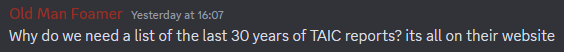

The program uses pandas (as I am a Stats major, Data Science minor, this was far more comfortable and familiar for me) to load the data from my spreadsheets into dataframes, then used the NLTK stopwords and my own to preprocess data for TTR analysis. The other metrics used the raw text to stay true to the tone of the piece for lexical sophistication and sentiment analysis.

I created several of my own functions to handle some of the lighter stuff, for frequencies, averages and some metrics (though not all metrics were saved to the era dictionary), while using functions and resources provided in the lectures for lexical sophisticaiton and sentiment analysis.

In [ ]:
#mount drive, load report CSVs as table objects

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Each category represents a different era of NZ rail, from 1993 (TAIC was given authority over rail investigations in '92).

```
Category 1: Incidents occurring April 1993 to December 2003 - managed by Tranz Rail
Category 2: Incidents occuring January 2004 to June 2008 - managed by Toll NZ
Category 3: Incidents occurring July 2004 to June 2023 - managed by KiwiRail
```

Rather than just the raw text of the executive summaries as in the previous assignments, I made the life-shortening choice to collect each section of the report summary page and added them into a spreadsheet.

Automating this could have saved days and sanity but this has the added benefit of allowing me to have an intimate understanding of the database, fix formatting issues in the reports, and various spelling errors that put incidents in parts of the country with no rail service.
```
id:               report id
tagline:          brief tag including Locomotive(s) involved, Brief description of the incident, Location of the incident, Date of the incident
occurrence:       Date the incident occurred
publication:      Date the investigation report was released
lin:              Legacy Identification Number
summary:          TAIC executive summary
recommendations:  Safety recommendations (if any)
location:         Location of incident
```

In [ ]:
# Using pandas (my beloved) to store the sheets as a table
import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/1FG-Ko1Tqn2cGfUg5mG_d0UA9VNRcoi97pkaAe_RHAOQ/export?format=csv'
tranzrail = pd.read_csv(url)

url = 'https://docs.google.com/spreadsheets/d/1ZqbvlBojbf2ugyvQ02GAIlLwJyzQZeoaOIlJJu7UdGQ/export?format=csv'
tollnz = pd.read_csv(url)

url = 'https://docs.google.com/spreadsheets/d/1o9MqbitR7v23LLSBPg9M7SAh0EpstwD7DCfv3YTjZ2I/export?format=csv'
kiwirail = pd.read_csv(url)

## Preprocessing and Cleaning

Processing carried out prior to loading the data with pandas. As well as this, general formatting of the data carried out. All summaries converted to one-line strings, missing full stops added as much as possible, inconsistent bullet points changed to ';'

```
RO-1994-117
RO-1994-117R
```
Revised report, -117 dropped ("Superseded by report 94-117 Revised"), but kept as id RO-1994-117 for ID consistency. One other report has this - an addendum (added to the original retroactively so dropping the addendum for the same reasons)

```
RO-1996-102
```
"No report was published, one safety recommendation was issued." Dropped

```
RO-2004-114
RO-2004-122
RO-2004-124
RO-2005-101
RO-2005-104
RO-2005-106
RO-2005-110
RO-2005-114
```
[Investigation incorporated in report 04-123. Please refer to that report.] and other such reports in this time look at multiple similar incidents in a short span of time. Kiwirail will address this by copy pasting the report across all summaries, but those will all be included, as the summaries include content for all investigations covered. Something in the future to look at in preprocessing would be getting the reports as close as possible to representing 1 investigation per report.

Similarly a lot of investigations share safety recommendations. For now this shouldn't affect the results too much, as we are going to zap most of those out with isalpha() and our stopwords.

In categories 1 & 2, several reports didn't qualify for a TAIC investigation for whatever reason (no significant, too similar to completed investigations etc), so any report with summary [A preliminary investigation showed that the circumstances were not likely to have significant implications for transport safety. Consistent with section 13 of the TAIC Act the Commission discontinued the investigation and no report was published.] is removed from the data.

In [ ]:
import nltk
nltk.download(['stopwords', 'punkt_tab', 'vader_lexicon'])

headers = ['what', 'happened', 'why', 'it', 'we', 'can', 'learn', 'who', 'may', 'benefit', 'transport', 'accident', 'investigation', 'commission', 'tranz', 'toll', 'nz', 'kiwirail']

#gather more headers, pick some of the most frequent words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Using the most_common(50) of the processed corpus, I have handpicked some words to be included in our list of stopwords.

Removed
```
Tranz
Rail (matched case)
Toll
NZ
KiwiRail
```

We could look at further removing `One safety recommendation addressing these issues was made to the operator.` and other similar lines, as they are covered by the recommendations column, but for this exercise we will not.

I considered removing a lot of nouns as well (for example, 'Train' representing Train XYZ, rather than 'train'), but have tried to keep true to text as much as possible.

In [ ]:
def preprocess(df):
  #take df
  #iter summary, add preprocessed text as list
  #insert column, processed, with list as values (combined both steps as a lambda bc thats cool)
  df['processed'] = df['summary'].map(lambda summary: ' '.join([token for token in nltk.word_tokenize(summary) if (token.lower() not in nltk.corpus.stopwords.words('english') and token.lower() not in headers and (token != 'Rail')) and token.isalpha()]))

In [ ]:
preprocess(tranzrail)
preprocess(tollnz)
preprocess(kiwirail)

To further play around with the data set, it might pay to further clean the database by:
*   tagline: removing left/right whitespace
*   occurrence, publication: convert type to date
*   recommendations: convert to a count of safety recommendations, personally I would set as count of '/' for each report's recommendations


## Meat and Potatoes

## Lexical Diversity, Type Token Ratio

In [ ]:
def set_metric(dct, met, val):
  dct[met] = val

In [ ]:
def averages(df):
  df['tokens'] = df['processed'].map(lambda processed: len(processed.split()))
  df['types'] = df['processed'].map(lambda processed: len(set(processed.split())))

  average_tokens = sum(df['tokens'])
  average_types = sum(df['types'])
  average_ttr = average_types/average_tokens

  return average_tokens, average_types, average_ttr

In [ ]:
avg_tr = averages(tranzrail)
avg_tn = averages(tollnz)
avg_kr = averages(kiwirail)

print(f'The TranzRail era reports have an average number of {avg_tr[1]} types and {avg_tr[0]} tokens, and an average lexical diversity of {round(avg_tr[2], 4) * 100}%.')
print(f'The Toll NZ era reports have an average number of {avg_tn[1]} types and {avg_tn[0]} tokens, and an average lexical diversity of {round(avg_tn[2], 4) * 100}%.')
print(f'The KiwiRail era reports have an average number of {avg_kr[1]} types and {avg_kr[0]} tokens, and an average lexical diversity of {round(avg_kr[2], 4) * 100}%.')

The TranzRail era reports have an average number of 9494 types and 11547 tokens, and an average lexical diversity of 82.22%.
The Toll NZ era reports have an average number of 5037 types and 6668 tokens, and an average lexical diversity of 75.53999999999999%.
The KiwiRail era reports have an average number of 11602 types and 18073 tokens, and an average lexical diversity of 64.2%.


We can see that the lexical diversity of the eras TAIC reports have been decreasing on average. This can be explained by a few factors:
*   There are a greater number of reports in the first era than the second era, than the third era of NZ rail - more reports, more incidents, more opportunity for unique words.
*   The third era of rail seems to have introduced standard formatting for the report summaries, so a lot of words will appear frequently across all reports.
*   Second and third era rail tend to group more investigations of a similar nature together, leading to repeat summaries across multiple reports.





## Word Frequencies

In [ ]:
def frequencies(df, dct):
  corpus = df['processed'].tolist()
  c = ' '.join(corpus)
  dist = nltk.FreqDist(nltk.word_tokenize(c))

  set_metric(dct, 'fdist', dist)
  set_metric(dct, 'pcorpus', c)

In [ ]:
tr = dict(data = tranzrail)
tn = dict(data = tollnz)
kr = dict(data = kiwirail)

In [ ]:
frequencies(tranzrail, tr)
frequencies(tollnz, tn)
frequencies(kiwirail, kr)

<Axes: xlabel='Samples', ylabel='Counts'>

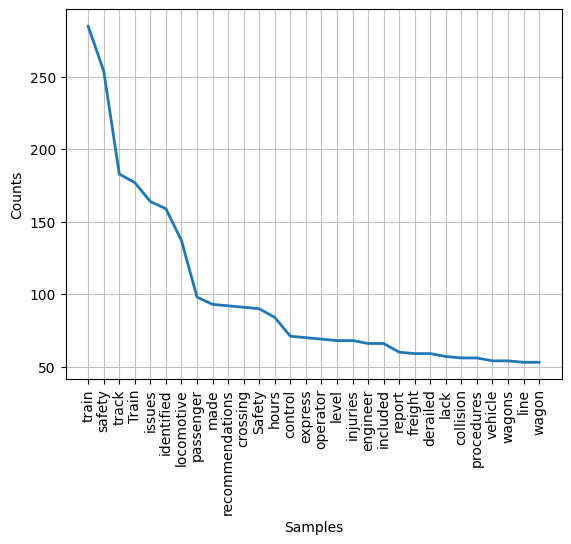

In [ ]:
import matplotlib.pyplot as plt

# 30 Most Frequent - TranzRail

low_freq = set([word for word in nltk.word_tokenize(tr['pcorpus']) if tr['fdist'][word] < 50])
for word in low_freq:
  del tr['fdist'][word]

tr['fdist'].plot()

<Axes: xlabel='Samples', ylabel='Counts'>

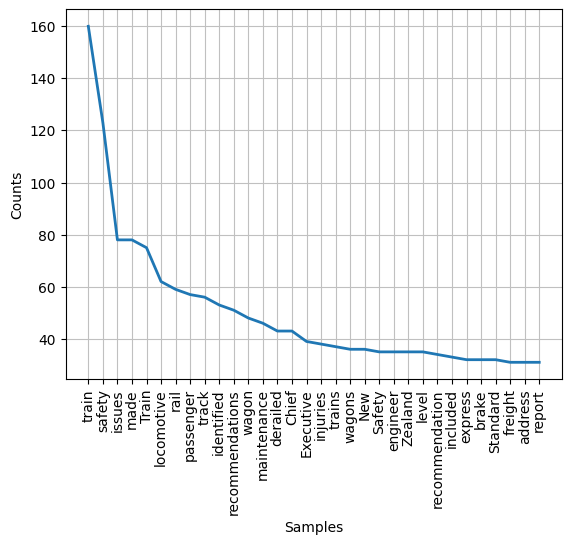

In [ ]:
# 30 Most Frequent - Toll NZ

low_freq = set([word for word in nltk.word_tokenize(tn['pcorpus']) if tn['fdist'][word] < 30])
for word in low_freq:
  del tn['fdist'][word]

tn['fdist'].plot()

<Axes: xlabel='Samples', ylabel='Counts'>

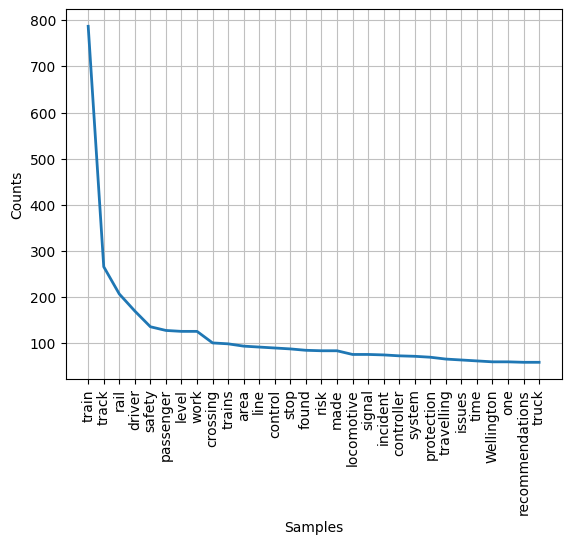

In [ ]:
# 30 Most Frequent - KiwiRail

low_freq = set([word for word in nltk.word_tokenize(kr['pcorpus']) if kr['fdist'][word] < 58])
for word in low_freq:
  del kr['fdist'][word]

kr['fdist'].plot()

In [ ]:
#to reset fdist

frequencies(tranzrail, tr)
frequencies(tollnz, tn)
frequencies(kiwirail, kr)

## Lexical Sophistication

In [ ]:
#Lexical sophistication, using helper function from lectures
# I used the non processed version of the corpus for this sectoion

import requests

# create a function to read in resource and output a dictionary.
def get_word_rating_resource(url):

  # read the raw text and split on newlines
  raw = requests.get(url).text.split('\n')

  # split each pair and convert value to rounded float
  # the if statement is there to avoid indexing errors when a row in a resource doesn't have complete data
  raw_list = [(pair.split('\t')[0], round(float(pair.split('\t')[1]), 3)) for pair in raw if len(pair.split('\t')) == 2]

  # create a dictionary and return it
  return dict(raw_list)

In [ ]:
#load dicts, metrics function

freq_url = 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/subtlxus_frequency.txt'
freq_dict = get_word_rating_resource(freq_url)

aoa_url = 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/AoA_Brysbart.txt'
aoa_dict = get_word_rating_resource(aoa_url)

concrete_url = 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/concreteness.txt'
concrete_dict = get_word_rating_resource(concrete_url)

semd_url = 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/lexical-resources/semantic_diversity.txt'
semd_dict = get_word_rating_resource(semd_url)

def calculate_metric(text, dictionary):
  # create empty output container
  metric = []

  # tokenize the text (and any other preprocessing you might need)
  tokens = nltk.word_tokenize(text)

  # check if token is in dictionary and append to metric output if so
  for token in tokens:
    if token in dictionary.keys():
      metric.append(dictionary[token])

  # cacluate coverage
  coverage = len(metric) / len(tokens)

  # the function now returns two values
  return metric, coverage

In [ ]:
def sophistication(df, dct):
  corpus = df['summary'].tolist()
  c = ' '.join(corpus)
  set_metric(dct, 'corpus', c)

  #average frequency
  frequencies = calculate_metric(c, freq_dict)
  freq = sum(frequencies[0])/len(frequencies[0])
  freqc = frequencies[1]

  #average aoa
  aoas = calculate_metric(c, aoa_dict)
  aoa = sum(aoas[0]) / len(aoas[0])
  aoac = aoas[1]

  #average concreteness
  concreteness = calculate_metric(c, concrete_dict)
  cc = sum(concreteness[0]) / len(concreteness[0])
  ccc = concreteness[1]

  #average semantic diversity
  sem_ds = calculate_metric(c, semd_dict)
  sem = sum(sem_ds[0]) / len(sem_ds[0])
  semc = sem_ds[1]

  return freq, freqc, aoa, aoac, cc, ccc, sem, semc
# obtain an average frequency

In [ ]:
sop_tr = sophistication(tranzrail, tr)
sop_tn = sophistication(tollnz, tn)
sop_kr = sophistication(kiwirail, kr)

print(f'TranzRail summaries have an average word frequency of {round(sop_tr[0], 2)} (coverage {round(sop_tr[1], 4) * 100}%), age of acquisition of {round(sop_tr[2], 2)} (coverage {round(sop_tr[3], 4) * 100}%), \nconcreteness of {round(sop_tr[4], 2)} (coverage {round(sop_tr[5], 4) * 100}%), and semantic diversity of {round(sop_tr[6], 2)} (coverage {round(sop_tr[7], 4) * 100}%)')
print(f'Toll NZ summaries have an average word frequency of {round(sop_tn[0], 2)} (coverage {round(sop_tn[1], 4) * 100}%), age of acquisition of {round(sop_tn[2], 2)} (coverage {round(sop_tn[3], 4) * 100}%), \nconcreteness of {round(sop_tn[4], 2)} (coverage {round(sop_tn[5], 4) * 100}%), and semantic diversity of {round(sop_tn[6], 2)} (coverage {round(sop_tn[7], 4) * 100}%)')
print(f'KiwiRail summaries have an average word frequency of {round(sop_kr[0], 2)} (coverage {round(sop_kr[1], 4) * 100}%), age of acquisition of {round(sop_kr[2], 2)} (coverage {round(sop_kr[3], 4) * 100}%), \nconcreteness of {round(sop_kr[4], 2)} (coverage {round(sop_kr[5], 4) * 100}%), and semantic diversity of {round(sop_kr[6], 2)} (coverage {round(sop_kr[7], 4) * 100}%)')

TranzRail summaries have an average word frequency of 4.05 (coverage 76.5%), age of acquisition of 5.72 (coverage 56.21000000000001%), 
concreteness of 2.52 (coverage 64.67%), and semantic diversity of 2.05 (coverage 72.09%)
Toll NZ summaries have an average word frequency of 4.07 (coverage 75.46000000000001%), age of acquisition of 5.79 (coverage 55.11000000000001%), 
concreteness of 2.49 (coverage 63.74999999999999%), and semantic diversity of 2.06 (coverage 71.39999999999999%)
KiwiRail summaries have an average word frequency of 4.18 (coverage 80.66%), age of acquisition of 5.66 (coverage 60.519999999999996%), 
concreteness of 2.52 (coverage 70.15%), and semantic diversity of 2.08 (coverage 77.83%)


There are no significant differences between the metrics for lexical sophistication of each era of rail, so we can conclude that the level of language has stayed relatively consistent across the years, even suggesting guidelines for word choice. This is further supported from a line found in one of the summaries:
```
(Note this executive summary condenses content to highlight key points to
 readers and does so in simpler language and with less technical precision than
 the remainder of the report for the benefit of a non-expert reader.
 Expert readers should refer to and rely on the body of the full report.)
```

## Sentiment Analysis

In [ ]:
#sentiment, function from lectures
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def sentiment_lookup(sentence, sentiment_dict):
  # tokenise a lower-cased version of our sentence
  tokens = nltk.word_tokenize(sentence.lower())

  # initalise empty output to store sentiment ratings
  output = []

  for token in tokens:
    # first check if the token is even in the dictionary
    if token in sentiment_dict.keys():
      # add the rating to the output
      output.append(sentiment_dict[token])

 # we calculate the average sentiment of the text from all the values in our output
  if output:
    avg_sentiment = sum(output)/len(output)
  # let's inform the user how many words from the sentence were actually used in the calculation
    print(f'sentiment is {avg_sentiment},\ncalculation used {round(len(output)/len(tokens)*100, 2)}% of words,\nwhich is {len(output)} words total')
  # we need to prevent a division error if there are no words in the dictionary.
  else:
    print('Nothing in this text was in the sentiment dictionary')

In [ ]:
print(sentiment_lookup(tr['corpus'], sid.lexicon), sentiment_lookup(tn['corpus'], sid.lexicon), sentiment_lookup(kr['corpus'], sid.lexicon))
#this wont print as a printf format (?), so read as TranzRail, Toll NZ, KiwiRail sentiment scores

sentiment is -0.17262750161394044,
calculation used 6.68% of words,
which is 1549 words total
sentiment is -0.2884472049689433,
calculation used 5.9% of words,
which is 805 words total
sentiment is -0.2265499290108832,
calculation used 5.57% of words,
which is 2113 words total
None None None


We can't make a strong conclusion about the trend of sentiment used in the reports, but we can see that on average, it is consistently slightly negative in tone. This is likely due to the nature of the content covered in the reports, while trying to neutralise the sentiments of death where possible.

## Conclusion

So we can conclude that across all reports in the last 30 years of TAIC rail investigations, they tend to have a slightly negative sentiment/tone of ~-0.2 (which we expected given the nature of the texts), and fairly consistent lexical sophistication ratings with an average: word frquency of ~4, age of acquisition of ~5.7, a concreteness of ~2.5 (1 being abstract, 5 being concrete), and semantic diversity of ~2.

The lexical diversity of the summaries went down with each era, which suggests a level of standardisation applied to the reports, but this difference could be further underlined with further preprocessing.

Once again my greatest enemy seemed to be the hands of time, this time bringing the holiday closure of the university for backup. I would have liked to show these relationships graphically, or explore further into other research areas, like
*   The relationship between number of safety recommends and the contents of the summaries
*   A reframed look at my assignment 2, with better location categorisation

There are definitely areas for improvement in my preprocessing stage, with problems like repetition and bloat addressed earlier.

It would be interesting to apply this analysis to the other transport types that TAIC investigates, marine and aviation, to see if this carries as well.

Finally I would like to apply ANOVA (variation analysis) to the data, to see if anything particularly shiny catches my attention for further investigation.